In [7]:
import importlib
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
sys.path.append(src_path)
from classification import *
from utils import *

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_80= pd.read_csv("../data/train80.csv")
train_70= pd.read_csv("../data/train70.csv")
test_20= pd.read_csv("../data/test20.csv")
test_30= pd.read_csv("../data/test30.csv")

In [ ]:
# Define the list of features for X
feature_cols = [
    'vendor_id', 'passenger_count',
    'store_and_fwd_flag',
    # Distance & Spatial Metrics
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'haversine_distance', 
    'manhattan_distance', 
    # Time Features
    'pickup_hour_sin', 'pickup_hour_cos', 
    'pickup_weekday_sin', 'pickup_weekday_cos',
    # Time Indicators
    'weekend_indicator', 'rush_hour'
]

X1_train = train_80[feature_cols]
y1_train = train_80['accepted']
X1_test= test_20[feature_cols]
y1_test= test_20['accepted']

X2_train = train_70[feature_cols]
y2_train = train_70['accepted']
X2_test= test_30[feature_cols]
y2_test= test_30['accepted']

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [14]:
# Storage for 80/20 test results (will be used later)
logistic_results_80_20 = []

#Initialize Models
log_reg  = MyLogisticRegression(learning_rate=0.1, max_iter=2000, penalty=None)
ridge_reg = MyLogisticRegression(learning_rate=0.1, max_iter=2000, penalty='l2', lambda_=1.0)
lasso_reg = MyLogisticRegression(learning_rate=0.1, max_iter=2000, penalty='l1', lambda_=1.0)

#Train on 80-20 split 
print("------------------------ Training models on 80/20 split --------------------------------")
log_reg.fit(X1_train_scaled, y1_train)
ridge_reg.fit(X1_train_scaled, y1_train)
lasso_reg.fit(X1_train_scaled, y1_train)

print("------------------------ Predicting 80/20 split --------------------------------")
# TRAIN metrics (80/20)
evaluate_classifier("Logistic Regression (train 80/20)", y1_train, log_reg.predict(X1_train_scaled), log_reg.predict_proba(X1_train_scaled))
evaluate_classifier("Ridge Logistic Regression (train 80/20)", y1_train, ridge_reg.predict(X1_train_scaled), ridge_reg.predict_proba(X1_train_scaled))
evaluate_classifier("Lasso Logistic Regression (train 80/20)", y1_train, lasso_reg.predict(X1_train_scaled), lasso_reg.predict_proba(X1_train_scaled))

# ----------- TEST metrics (80/20) + STORE in list ----------------
# Logistic
metrics_log = evaluate_classifier("Logistic Regression (test 80/20)",y1_test,log_reg.predict(X1_test_scaled),log_reg.predict_proba(X1_test_scaled),show_report=False)
logistic_results_80_20.append({"Model": "Logistic (No Reg)", "Accuracy": metrics_log["accuracy"], "ROC-AUC": metrics_log["roc_auc"], "F1-Score": metrics_log["f1"] })

# Ridge-Logistic
metrics_ridge = evaluate_classifier("Ridge Logistic Regression (test 80/20)", y1_test,ridge_reg.predict(X1_test_scaled),ridge_reg.predict_proba(X1_test_scaled), show_report=False)
logistic_results_80_20.append({"Model": "Logistic (L2)","Accuracy": metrics_ridge["accuracy"],"ROC-AUC": metrics_ridge["roc_auc"],"F1-Score": metrics_ridge["f1"]})

# Lasso-Logistic
metrics_lasso = evaluate_classifier("Lasso Logistic Regression (test 80/20)",y1_test,lasso_reg.predict(X1_test_scaled),lasso_reg.predict_proba(X1_test_scaled),show_report=False)
logistic_results_80_20.append({"Model": "Logistic (L1)","Accuracy": metrics_lasso["accuracy"],"ROC-AUC": metrics_lasso["roc_auc"],"F1-Score": metrics_lasso["f1"]})

#Train on 70-30 split 
print("------------------------ Training models on 70/30 split --------------------------------")
log_reg.fit(X2_train_scaled, y2_train)
ridge_reg.fit(X2_train_scaled, y2_train)
lasso_reg.fit(X2_train_scaled, y2_train)

print("------------------------ Predicting 70/30 split --------------------------------")
# TRAIN metrics (70/30)
evaluate_classifier("Logistic Regression (train 70/30)", y2_train, log_reg.predict(X2_train_scaled), log_reg.predict_proba(X2_train_scaled))
evaluate_classifier("Ridge Logistic Regression (train 70/30)", y2_train, ridge_reg.predict(X2_train_scaled), ridge_reg.predict_proba(X2_train_scaled))
evaluate_classifier("Lasso Logistic Regression (train 70/30)", y2_train, lasso_reg.predict(X2_train_scaled), lasso_reg.predict_proba(X2_train_scaled))

# TEST metrics (70/30)
evaluate_classifier("Logistic Regression (test 70/30)", y2_test, log_reg.predict(X2_test_scaled), log_reg.predict_proba(X2_test_scaled))
evaluate_classifier("Ridge Logistic Regression (test 70/30)", y2_test, ridge_reg.predict(X2_test_scaled), ridge_reg.predict_proba(X2_test_scaled))
evaluate_classifier("Lasso Logistic Regression (test 70/30)",y2_test, lasso_reg.predict(X2_test_scaled), lasso_reg.predict_proba(X2_test_scaled))



------------------------ Training models on 80/20 split --------------------------------
------------------------ Predicting 80/20 split --------------------------------
--- Logistic Regression (train 80/20) ---
Accuracy : 0.8025
Precision: 0.8400
Recall   : 0.8296
F1-score : 0.8348
ROC-AUC  : 0.861505916623205
Confusion Matrix:
[[354144 110891]
 [119607 582270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75    465035
           1       0.84      0.83      0.83    701877

    accuracy                           0.80   1166912
   macro avg       0.79      0.80      0.79   1166912
weighted avg       0.80      0.80      0.80   1166912


--- Ridge Logistic Regression (train 80/20) ---
Accuracy : 0.8025
Precision: 0.8400
Recall   : 0.8296
F1-score : 0.8348
ROC-AUC  : 0.8615056542160667
Confusion Matrix:
[[354144 110891]
 [119607 582270]]
Classification Report:
              precision    recall  f1-score   support

  

{'name': 'Lasso Logistic Regression (test 70/30)',
 'accuracy': 0.8024026947476188,
 'precision': 0.84113945499638,
 'recall': 0.8284888462370037,
 'f1': 0.8347662244100432,
 'roc_auc': 0.8617807526984944,
 'confusion_matrix': array([[132708,  41251],
        [ 45216, 218417]])}

In [11]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier 
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their hyperparameter grids
models = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    },
    
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=4), 
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [5, 10],
            "max_samples": [0.5], 
            "max_features": ["sqrt", "log2"]
        }
    },
    
    "Gradient Boosting": {
        "model": HistGradientBoostingClassifier(random_state=42, early_stopping=True),
        "params": {
            "max_iter": [50, 100],        
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5, None]     
        }
    },
    
    "SVM (SGD)": {
        "model": SGDClassifier(loss='modified_huber', penalty='l2', n_jobs=4, random_state=42, class_weight='balanced'),
        "params": {
            "alpha": [0.0001, 0.001, 0.01],
            "penalty": ["l2", "l1", "elasticnet"]
        }
    }
}

In [12]:
results = []
trained_models = {}

print(f"{'Model':<20} | {'Accuracy':<10} | {'ROC-AUC':<10} | {'F1-Score':<10}")
print("-" * 60)

for name, config in models.items():

    # Use scaled data for all (safe + consistent)
    X_train_curr = X1_train_scaled
    X_test_curr  = X1_test_scaled

    # Hyperparameter Tuning
    clf = RandomizedSearchCV(
        config["model"],
        config["params"],
        n_iter=5,
        cv=StratifiedKFold(n_splits=3),
        scoring='f1',
        n_jobs=4,
        random_state=42
    )

    clf.fit(X_train_curr, y1_train)
    best_model = clf.best_estimator_
    trained_models[name] = best_model

    # Predictions
    y_pred = best_model.predict(X_test_curr)

    # Handle predict_proba / decision_function safely
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test_curr)[:, 1]
    elif hasattr(best_model, "decision_function"):
        from scipy.special import expit
        y_prob = expit(best_model.decision_function(X_test_curr))
    else:
        y_prob = y_pred.astype(float)

    # ⬅️ Replace sklearn metrics with our evaluate_classifier()
    metrics = evaluate_classifier(
        f"{name} (Test 80/20)",
        y1_test,
        y_pred,
        y_prob,
        show_report=False  # keep clean printing
    )

    # Store results in your results list
    results.append({
        "Model": name,
        "Accuracy": metrics["accuracy"],
        "ROC-AUC": metrics["roc_auc"],
        "F1-Score": metrics["f1"],
        "Best Params": clf.best_params_
    })

    print(f"{name:<20} | {metrics['accuracy']:.4f}     | {metrics['roc_auc']:.4f}     | {metrics['f1']:.4f}")


Model                | Accuracy   | ROC-AUC    | F1-Score  
------------------------------------------------------------
--- Decision Tree (Test 80/20) ---
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC-AUC  : 1.0
Confusion Matrix:
[[115986      0]
 [     0 175742]]

Decision Tree        | 1.0000     | 1.0000     | 1.0000


/home/diddy/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


--- Random Forest (Test 80/20) ---
Accuracy : 1.0000
Precision: 0.9999
Recall   : 1.0000
F1-score : 1.0000
ROC-AUC  : 0.9999999845954678
Confusion Matrix:
[[115977      9]
 [     0 175742]]

Random Forest        | 1.0000     | 1.0000     | 1.0000


/home/diddy/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


--- Gradient Boosting (Test 80/20) ---
Accuracy : 0.9992
Precision: 0.9987
Recall   : 1.0000
F1-score : 0.9993
ROC-AUC  : 0.9999957198703713
Confusion Matrix:
[[115753    233]
 [     6 175736]]

Gradient Boosting    | 0.9992     | 1.0000     | 0.9993
--- SVM (SGD) (Test 80/20) ---
Accuracy : 0.7635
Precision: 0.8841
Recall   : 0.6990
F1-score : 0.7807
ROC-AUC  : 0.8562160190849304
Confusion Matrix:
[[ 99883  16103]
 [ 52904 122838]]

SVM (SGD)            | 0.7635     | 0.8562     | 0.7807



Final Comparative Analysis:
               Model  Accuracy   ROC-AUC  F1-Score
0      Decision Tree  1.000000  1.000000  1.000000
1      Random Forest  0.999969  1.000000  0.999974
2  Gradient Boosting  0.999181  0.999996  0.999320
6      Logistic (L1)  0.802151  0.861511  0.834592
5      Logistic (L2)  0.802151  0.861511  0.834591
4  Logistic (No Reg)  0.802148  0.861512  0.834589
3          SVM (SGD)  0.763454  0.856216  0.780709


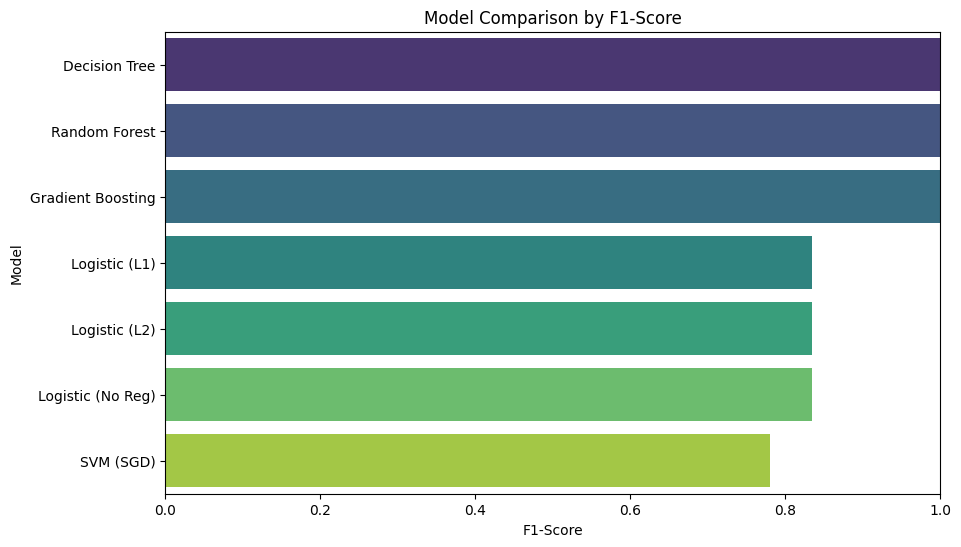


Detailed Report for Best Model: Decision Tree


/home/diddy/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.43      0.20      0.27    115986
           1       0.61      0.82      0.70    175742

    accuracy                           0.58    291728
   macro avg       0.52      0.51      0.49    291728
weighted avg       0.54      0.58      0.53    291728



In [15]:
# Convert results to DataFrame
combined_results = results + logistic_results_80_20
results_df = pd.DataFrame(combined_results).sort_values(by='F1-Score', ascending=False)

# Display Comparison Table
print("\nFinal Comparative Analysis:")
print(results_df[['Model', 'Accuracy', 'ROC-AUC', 'F1-Score']])

# Visualization: Model Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score', y='Model', data=results_df, hue='Model',palette='viridis',legend=False)
plt.title('Model Comparison by F1-Score')
plt.xlim(0, 1.0)
plt.show()

# Detailed Report for the Best Model
best_model_name = results_df.iloc[0]['Model']
print(f"\nDetailed Report for Best Model: {best_model_name}")
# Note: Re-predicting to show report
best_est = trained_models[best_model_name]
X_final = X1_test_scaled if best_model_name == "SVM" else X1_test
print(classification_report(y1_test, best_est.predict(X_final)))